In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the data/csv file
data = pd.read_csv('/home/srija/Downloads/Compressed/Datasets/Salary_Data.csv')


In [3]:
#intial 5 rows of the csv file
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#Extracting the columns
x=data.iloc[:,0].values #data['YearsExperience'].values
y=data.iloc[:,1].values #data['Salary'].values

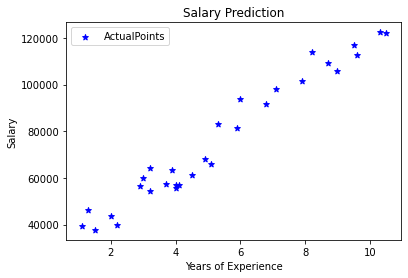

In [5]:
#plot the dataset
plt.scatter(x,y,color='Blue',label='ActualPoints',marker='*')
plt.legend()
plt.title('Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [6]:
##Splitting the data into training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 0)


In [7]:
#Reshaping the 1D array as 2D array
xtrain = xtrain.reshape(len(xtrain),1)
xtest = xtest.reshape(len(xtest),1)
ytrain = ytrain.reshape(len(ytrain),1)
ytest = ytest.reshape(len(ytest),1)


In [8]:
#Hyperparameters
alpha=0.01
iterations=1500
theta=np.zeros([2,1])

In [9]:
#Defining a shaping function for matrix Multiplication of x and theta
def shaping(x):
    ones = np.ones((len(x),1))
    x=np.hstack((ones,x))
    return x

In [10]:
#Defining the cost function
## cost function = (1/2m) * sigma(1->m) (h(x)-y)**2
## h(x) = theta0 + theta1(x)
def ComputeCost(x,y,theta):
    x = shaping(x)
    Error=(x @theta) -y    
    temp=np.sum(np.power(Error,2))
    return temp/(2*len(x))           ##returns average of square error 


In [11]:
train_cost_bef_optimisation=ComputeCost(xtrain,ytrain,theta) ## function call
print(train_cost_bef_optimisation)

2930252301.6190476


In [12]:
#Defining the Gradient descent to find theta values that minimizes the cost function
## theta = theta - alpha * derivative(cost function)
## Derivative(Cost Function) = (1/m) * sigma(1->m) (h(x)-y)*x
## theta = theta - (alpha/m)* sigma(1->m) (h(x)-y)*x
def GradientDescent(x,y,alpha,theta,iterations):
    cost = []
    iters = []
    for i in range(iterations):
        x = shaping(x)
        Error=(x @ theta)-y
        temp=(x.T @ Error)
        theta=theta-(alpha/len(x))*temp
        x = np.delete(x,0,axis = 1)
        cost.append(ComputeCost(x,y,theta))
        iters.append(i)       
    return theta,cost,iters ## returns updated parameters

In [13]:
weights,cost,iters=GradientDescent(xtrain,ytrain,alpha,theta,iterations) ## function call
print(weights) ## prints optimised parameter


[[25730.74830618]
 [ 9529.5986595 ]]


In [14]:
# print error with optimised parameters
train_cost_aft_optimisation=ComputeCost(xtrain,ytrain,weights)
print(train_cost_aft_optimisation)

17676222.708973017


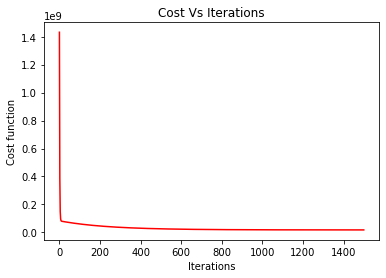

In [15]:
#plotting Cost Vs Iterations
plt.title('Cost Vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.plot(iters,cost,color='Red')
plt.show()



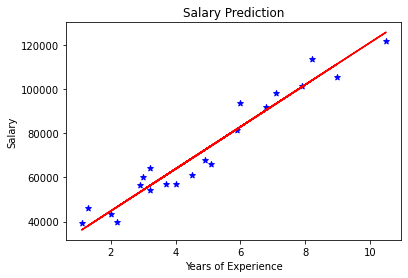

In [16]:
##plotting line of best fit
plt.scatter(xtrain,ytrain,color='Blue',label='ActualPoints',marker='*') ##plot dataset
plt.title('Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
xtrain = shaping(xtrain)
plt.plot(xtrain[:,1],np.dot(xtrain,weights),color = 'Red') ## plot predictions as line of best fit
plt.show()

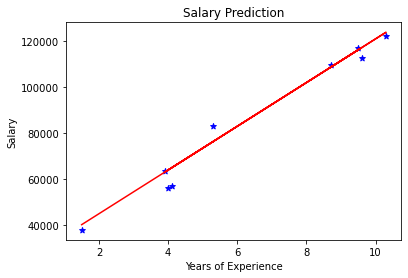

In [17]:
##plotting line of best fit
plt.scatter(xtest,ytest,color='Blue',label='ActualPoints',marker='*') ##plot dataset
plt.title('Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
xtest = shaping(xtest)
plt.plot(xtest[:,1],np.dot(xtest,weights),color = 'Red') ## plot predictions as line of best fit
plt.show()

In [18]:
## predicting y values
def salary_predict():
    x=float(input("Enter the years of experience:"))
    y_pred=weights[0,:]+x*weights[1,:]
    return "Salary of employee :"+str(y_pred)

In [20]:
ytest

array([[ 37731.],
       [122391.],
       [ 57081.],
       [ 63218.],
       [116969.],
       [109431.],
       [112635.],
       [ 55794.],
       [ 83088.]])

In [21]:
ypred = xtest @ weights
ypred

array([[ 40025.14629544],
       [123885.61449907],
       [ 64802.10281015],
       [ 62896.18307825],
       [116261.93557147],
       [108638.25664387],
       [117214.89543742],
       [ 63849.1429442 ],
       [ 76237.62120155]])

In [22]:
salary_predict()

Enter the years of experience:30


'Salary of employee :[311618.70809129]'